# TASK 2- MOVIE RATING PREDICTION WITH PYTHON


# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rnd
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [3]:
data = pd.read_csv('IMDb-Movies-India.csv', encoding='latin1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Finding null values

In [5]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# Describing the data

In [8]:
data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [9]:
#genre, director, and actors values counts
data['Genre'].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [10]:
data['Director'].value_counts()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: Director, Length: 2431, dtype: int64

# Shape

In [11]:
data.shape

(5659, 10)

# Correlation

In [12]:
data.corr()

,Rating
Rating,1.0


In [13]:
data.shape

(5659, 10)

# Data Visualization

In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud

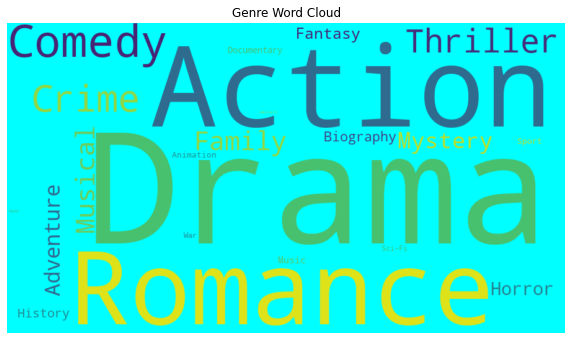

In [16]:
# Split genres, stack them, and count occurrences
genre_counts = data['Genre'].str.split(', ', expand=True).stack().value_counts()

# Create a WordCloud
wordcloud = WordCloud(width=900, height=500, background_color='cyan').generate_from_frequencies(genre_counts)

# Create a figure and display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [17]:
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

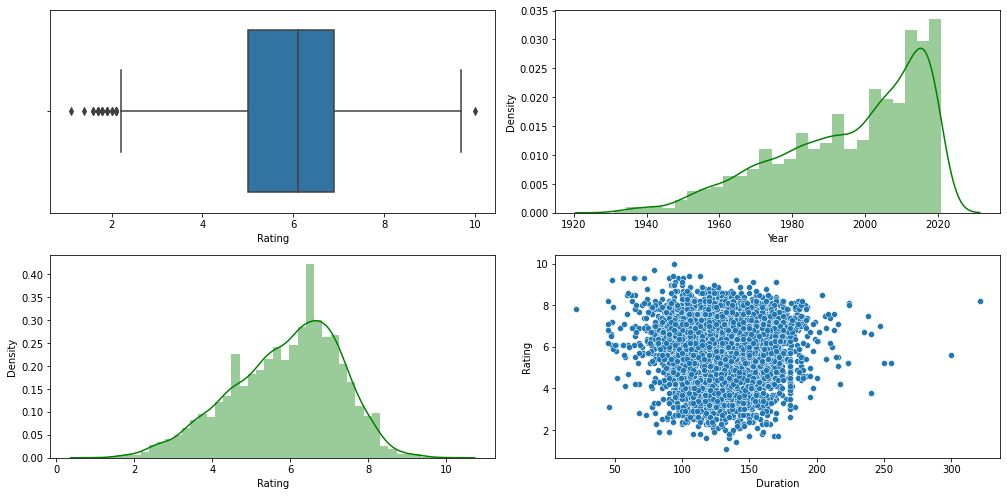

In [18]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Rating', data=data)

plt.subplot(2,2,2)
sns.distplot(data['Year'], color='g')

plt.subplot(2,2,3)
sns.distplot(data['Rating'], color='g')

plt.subplot(2,2,4)
sns.scatterplot(x=data['Duration'], y=data['Rating'], data=data)

plt.tight_layout()
plt.show()

In [19]:
data.drop(['Actor 1','Actor 2','Actor 3','Director','Name','Genre'],axis=1,inplace=True)


In [20]:
data.dtypes


Year        float64
Duration    float64
Rating      float64
Votes        object
dtype: object

In [21]:
data.columns

Index(['Year', 'Duration', 'Rating', 'Votes'], dtype='object')

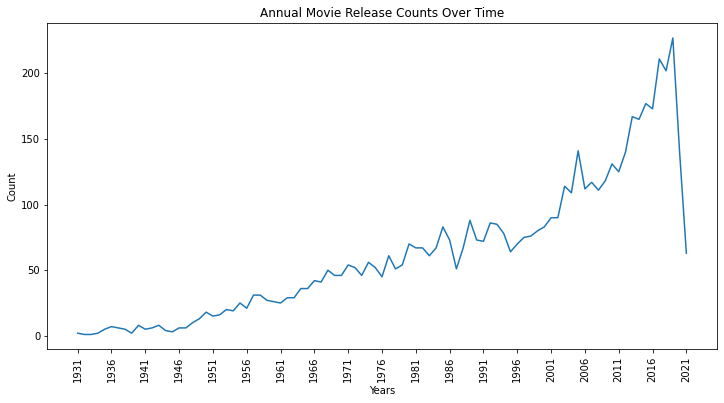

In [22]:
# Calculate the annual movie release counts and sort by year
yearly_counts = data['Year'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_counts)
ax.set(title="Annual Movie Release Counts Over Time",
       xlabel="Years",
       ylabel="Count")
ax.set_xticks(range(int(min(yearly_counts.index)), int(max(yearly_counts.index)) + 1, 5))
plt.xticks(rotation=90)
plt.show()

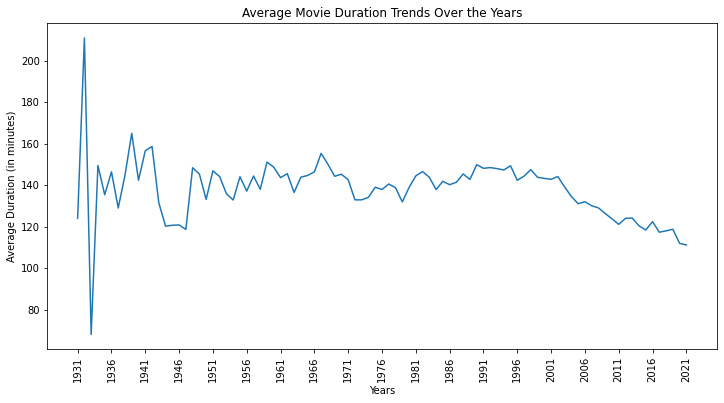

In [23]:
# Calculate the average movie duration by year
average_durations = data.groupby('Year')['Duration'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=average_durations, x='Year', y='Duration')
ax.set(title="Average Movie Duration Trends Over the Years",
       xlabel="Years",
       ylabel="Average Duration (in minutes)")
ax.set_xticks(range(int(min(average_durations['Year'])), int(max(average_durations['Year'])) + 1, 5))
plt.xticks(rotation=90)
plt.show()

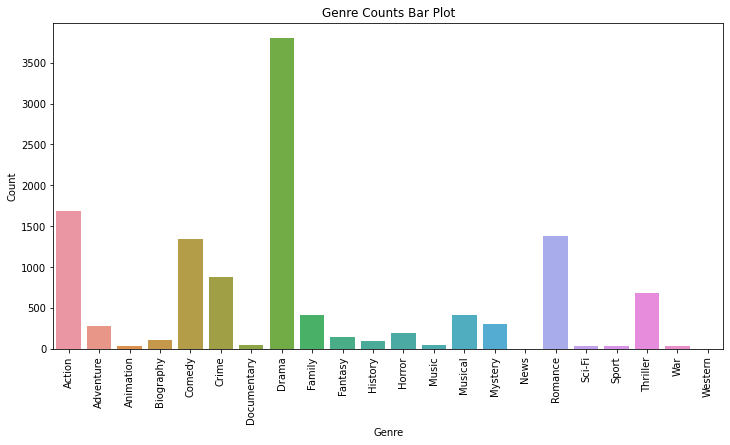

In [24]:
# Sort genre_counts dictionary and extract labels and counts
genreLabels = sorted(genre_counts.keys())
genreCounts = [genre_counts[label] for label in genreLabels]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genreLabels, y=genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation=90)
ax.set_title("Genre Counts Bar Plot")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.show()

# Heat Map

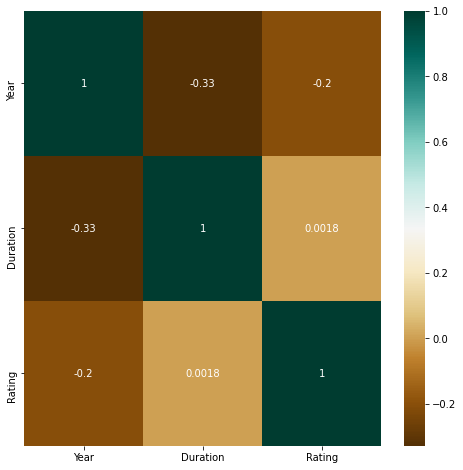

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap='BrBG',annot=True)
plt.show()

# Data Modeling

In [26]:
predict='Rating'
features=['Year','Duration','Rating']

X=np.array(data[features].drop(columns=[predict]))
Y=np.array(data[predict])

In [27]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=20)

In [28]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (3961, 2)
x_test.shape: (1698, 2)
y_train.shape: (3961,)
y_test.shape: (1698,)


# Model Building

# Loading the models

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        r2s=r2_score(y_test, test_data_prediction)*100 
        print('r2_score of the',model,'=',r2s)
compare_models_train_test()

r2_score of the LinearRegression() = 4.779154141419828
r2_score of the SVR() = 2.878820171420482
r2_score of the RandomForestRegressor() = -15.434501190302964
r2_score of the DecisionTreeRegressor() = -55.72890108585382


In [32]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        meanabsolute=mean_absolute_error(y_test, test_data_prediction)
        print('Meanabsolute of the',model,'=',meanabsolute)
compare_models_train_test()

Meanabsolute of the LinearRegression() = 1.1073196595806833
Meanabsolute of the SVR() = 1.1149223089302007
Meanabsolute of the RandomForestRegressor() = 1.1857782051164465
Meanabsolute of the DecisionTreeRegressor() = 1.3691853861686016


In [33]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        meansquare=mean_squared_error(y_test, test_data_prediction)
        print('Meansquare of the',model,'=',meansquare)
compare_models_train_test()

Meansquare of the LinearRegression() = 1.8742400753203132
Meansquare of the SVR() = 1.9116445118273684
Meansquare of the RandomForestRegressor() = 2.272399686241776
Meansquare of the DecisionTreeRegressor() = 3.0561406081234024


# Model Saving

In [34]:
import pickle

In [35]:
for model in models:
    filename = ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")
     

Saved all Models
